# Clasificación con K-NN usando Scikit-learn

Notebook basado en: https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

En este ejemplo vamos a clasificar imágenes de flores Iris en 3 clases: Iris Setosa (0), Iris Versicolor (1) e Iris Virginica (2).

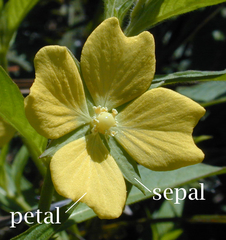

## A) Cargando el dataset

Primero procedemos a leer el dataset y particionarlo en train (70%) y test (30%) usando 

``sklearn.model_selection.train_test_split``:

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()

print "Características: "
print iris.feature_names

print "Total de muestras: " + str(len(iris.target))

# X_train, X_test, y_train, y_test = ........

print "Muestras de entrenamiento: " + str(len(y_train))

print "Muestras de prueba: " + str(len(y_test))


## B) Visualizando las features

Visualizar con un scatter plot de matplot lib las features extraídas de los sépalos (columnas 0 y 1) y de los pétalos (columnas 2 y 3) en los datos de entrenamiento (X_train), utilizando un color distinto por clase, y evaluar visualmente su poder discriminativo.

**Pregunta 1: Generar los gráficos correspondientes y determinar: Qué combinación resulta más discriminativa al observar la distribución de las muestras y por qué?**


In [ ]:
import seaborn
import matplotlib.pyplot as plt

plt.figure()
plt.title(iris.feature_names[0] + "[eje x] vs " + iris.feature_names[1] + "[eje y]")
plt.scatter(.....)

plt.figure()
plt.title(iris.feature_names[2] + "[eje x] vs " + iris.feature_names[3] + "[eje y]")
plt.scatter(......)

## C) Seleccionando hiperparámetros

A continuación, utilizaremos cross validation (``sklearn.metrics.cross_val_score``) para evaluar cual es el parámetro K que resulta en mejor y peor tasa de error, dados los datos de entrenamiento.

**Pregunta 2: Determinar el valor óptimo del hiperparámetro K usando cross validation, al utilizar sólo las features de los sépalos [0,1] y sólo la de los pétalos [2,3].**


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Crear una lista con los hiperparámetros k a probar (números impares entre 1 y 50)
neighbors = list(range(1,50,2))

# Features a utilizar para entrenar y predecir con KNN (sólo sépalos usarFeatures = [0,1] y sólo pétalos usarFeatures = [2,3])
usarFeatures = [0,1]

print "- Evaluando KNN para los valores: " + str(neighbors)
print "- Evaluando KNN utilizando features: " + str(usarFeatures) + " = " + str([iris.feature_names[i] for i in usarFeatures])

# Lista para guardar la calidad de las predicciones de cada k
scores = []

# Probar un KNN por cada valor de K
for k in neighbors:    
    # Crear el clasificador
    knn = ....
    
    # Generar los scores de accuracy usando cross validation con 10 particiones
    accuracies = cross_val_score(....)
    
    # Agregar la media de la calidad de las predicciones a la lista
    scores.append(....)
    
# Transformar accuracy en error de predicción
MSE = [1 - x for x in scores]

# Determinar el mejor y peor K
optimal_k = neighbors[MSE.index(min(MSE))]
worst_k = neighbors[MSE.index(max(MSE))]

print "\nEl número optimo de vecinos es %d el cual provee un error de clasificación en validación de: %f " % (optimal_k, min(MSE))
print "El peor rendimiento se obtiene con %d vecinos, el cual provee un error de clasificación en validación de: %f" % (worst_k, max(MSE))

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Numero de vecinos')
plt.ylabel('Error de clasificacion')
plt.show()

### D) Barreras de decisión y matriz de confusión

Graficar las barreras de decisión junto a los datos de test, correspondientes a los mejores y peores valores de k al utilizar features extráidas sólo de los pétalos [0,1] y sólo de los sépalos [2,3]. 

**Pregunta 3: Generar las gráficas de las fronteras de decisión correspondientes a los mejores y peores valores de K al utilizar features extráidas sólo de los pétalos [0,1] y sólo de los sépalos [2,3] y refleccionar acerca del efecto del parámetro K en dichas gráficas.** 



In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import metrics

from sklearn.metrics import confusion_matrix

# Features a utilizar para entrenar y predecir con KNN (sólo sépalos = [0,1] y sólo pétalos = [2,3])
usarFeatures = ......

# Valor de K a utilizar en el KNN
k = ......

# step size in the mesh
h = .02  

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Code based on: http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

print "Visualizando resultados para k = " + str(k)
knn = .........
    
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_test[:, usarFeatures[0]].min() - 1, X_test[:, usarFeatures[0]].max() + 1
y_min, y_max = X_test[:, usarFeatures[1]].min() - 1, X_test[:, usarFeatures[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

knn.fit(X_train[:,usarFeatures], y_train)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Dibujar también los test points
plt.scatter(X_test[:, usarFeatures[0]], X_test[:, usarFeatures[1]], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20)

# Computar las predicciones en el dataset de test
X_test_predictions = knn.predict(X_test[:,usarFeatures])

print "Métricas de predicción"
print metrics.classification_report(y_test, X_test_predictions)
    
print "Matriz de confusión"
confusion_matrix(y_test, X_test_predictions)
